# Repaso de Estadística + Distribuciones de probabilidad

## Pensamiento estadístico para programadores

El módulo **os** permite realizar actividades relacionadas con el sistema operativo y con ubicaciones en disco. Usando **os** es posible: crear una carpeta, listar contenidos de una carpeta, conocer acerca de un proceso, finalizar un proceso. [Ver documentación](https://docs.python.org/3/library/os.html).

In [1]:
import os

In [2]:
os.name

'nt'

In [3]:
os.getcwd()

'C:\\Users\\usuario\\eafit-s\\Cap1'

In [4]:
os.listdir()

['.ipynb_checkpoints',
 'bicicletas-compartidas.csv',
 'cars.csv',
 'cuadro.csv',
 'cuadro_resumen.csv',
 'data_ds_cp.xlsx',
 'departamentos_col.csv',
 'departamentos_col.xlsx',
 'DS_Bitácora_04_Iris.csv',
 'DS_Bitácora_04_Iris_comprobacion.csv',
 'DS_Bitácora_12_DTyKNN.ipynb',
 'DS_Bitácora_13_Evaluación.ipynb',
 'DS_Bitácora_14_Regresión.ipynb',
 'DS_Bitácora_19_Data_con_VF.csv',
 'DS_Bitácora_19_Data_VA1.csv',
 'DS_Bitácora_19_Data_VA2.csv',
 'DS_Bitácora_19_y_20_Preprocesamiento.ipynb',
 'DS_Bitácora_23_Data1.csv',
 'DS_Bitácora_23_Data2.csv',
 'DS_Bitácora_24_Challenger.csv',
 'Evaluaciones',
 'juego-azar.csv',
 'movies.csv',
 'Notebook_02_Python_Variables.ipynb',
 'Notebook_03_Python_Numpy.ipynb',
 'Notebook_04_Python_Estadística_y_Pandas.ipynb',
 'Notebook_05_Python_Matplotlib_Seaborn.ipynb',
 'Notebook_06_Python_Repaso_Cap_1.ipynb',
 'Notebook_07_Python_Probabilidad.ipynb',
 'Notebook_08_Distribuciones_de_prob.ipynb',
 'Notebook_09A_Regresiones.ipynb',
 'Notebook_09B_Clases_fun

## Repaso de Estadística
Hasta ahora hemos visto:
+ Medidas de tendencia central: media, mediana, moda.
+ Medidas de dispersión: varianza, desv. std., rangos.
+ Variables discretas y variables continuas
+ Distribuciones de probabilidad
 * Uniforme
 * Normal
+ Relaciones entre variables (correlación)
+ Covarianza

Ahora veremos:
1. Probabilidad condicional (Teorema de Bayes)
2. Distribuciones de probabilidad para variables continuas (las de mayor aplicación)
<br>**Normal**
<br>**Exponencial**: es la inversa de la Poisson. En Poisson cuentas número de eventos por unidad de tiempo. Acá se cuenta el tiempo que toma llegar a uno de esos eventos.
3. Distribuciones de probabilidad para variables discretas (las de mayor aplicación)
<br>**Bernoulli** - modela un efecto binario cero un fracaso, uno un exito
<br>**Binomial** - número de éxitos X asociados a N ensayos
<br>**Geométrica:** ensayos X antes de llegar al primer éxito de Bernoulli
<br>**Binomial negativa**: número de ensayos x para llegar al k-ésimo éxito
<br>**Poisson:** número de llegadas en N a una longitud de tiempo t
4. Estandarización, covarianza y correlación

No vamos a ver:
+ Distribuciones muestrales (Normal Estándar, t-Student, Chi-cuadrada, F Fisher-Snedecor)
+ Estimadores a través de datos
+ Estimadores de máxima verosimilitud
+ Teorema del límite central
+ Pruebas de hipótesis (error tipo 1 y tipo 2, intervalos de confianza)

## Diagramas de frecuencias para variables continuas y discretas

Tema: Diagramas de frecuencia o histograma
<br>Histograma
<br>Variables categóricas: Tablas de frecuencia
<br>Variables numéricas: percentiles, deciles, quintiles, y quartiles, outliers o val extremos.

In [5]:
import numpy as np
import pandas as pd
import scipy
import scipy.stats

df = pd.read_csv('bicicletas-compartidas.csv')
df.columns

Index(['fecha', 'bicis-compartidas', 'temp-obs', 'sens-temp', 'hum', 'viento',
       'codigo-clima', 'festivo', 'findesemana', 'cuartil-ano'],
      dtype='object')

In [6]:
# Frecuencias para valores categóricas
ycat = df['cuartil-ano']
# Que la variable sea una serie de números no necesariamente quiere decir que es una variable numérica

# Ahora vamos a transformar la variable en una categórica
ycat = ycat.apply(lambda x: 'Cat-' + str(int(x)))
ycat
ycat.head()

0    Cat-3
1    Cat-3
2    Cat-3
3    Cat-3
4    Cat-3
Name: cuartil-ano, dtype: object

In [7]:
# Unique trae los valores que puede tomar la variable y sus respectivos conteos:
valores, conteo_freq = np.unique(ycat, return_counts = True)
valores, conteo_freq

# Si quisiéramos diseñar una tabla (en este caso de frecuencias)

tabla_frecuencias = dict(zip(valores, conteo_freq))
tabla_frecuencias
# En este caso (estos valores) hay cierta uniformidad en los valores

{'Cat-0': 4394, 'Cat-1': 4387, 'Cat-2': 4303, 'Cat-3': 4330}

In [8]:
# Variable numérica
# Explorar máximo y mínimo de la velocidad del viento?
ynum = df['viento'].copy()
np.min(ynum), np.max(ynum)

(0.0, 56.5)

In [9]:
# Vamos a identificar los valores que acumulan un x % de probabilidad de los datos
np.percentile(ynum,q=100)

56.5

In [10]:
np.percentile(ynum,q=50) # Esto es la mediana

15.0

In [11]:
np.median(ynum)

15.0

In [12]:
# Vamos a definir los quartiles
valores = [0,25,50,75,100]
np.percentile(ynum,q=valores)
# Resultado: los números dentro de la variable y que acumulan cada percentil son:

array([ 0. , 10. , 15. , 20.5, 56.5])

In [13]:
# Vamos a definir los quintiles
valores = [0,20,60,80,100]
np.percentile(ynum,q=valores)

array([ 0. ,  9. , 17. , 22. , 56.5])

In [14]:
# Deciles
valores = list(range(0,110,10))
np.percentile(ynum,q=valores)

array([ 0. ,  6.5,  9. , 11. , 13. , 15. , 17. , 19.5, 22. , 27. , 56.5])

In [15]:
# Valores atípicos
y = df['bicis-compartidas']
y.describe()

count    17414.000000
mean      1143.101642
std       1085.108068
min          0.000000
25%        257.000000
50%        844.000000
75%       1671.750000
max       7860.000000
Name: bicis-compartidas, dtype: float64

In [16]:
# Outlier: valor que cae fuera del rango. Es una alerta de que puede pertenecer a una distribución diferente.
Q1 = np.percentile(ynum,q=25)
Q3 = np.percentile(ynum,q=75)

# Rango interquartílico
RI = Q3-Q1

lim_inf = Q1-1.5 * RI
lim_sup = Q3+1.5 * RI

[lim_inf,lim_sup]

[-5.75, 36.25]

(array([8.274e+03, 4.416e+03, 2.355e+03, 1.241e+03, 5.610e+02, 4.710e+02,
        8.800e+01, 2.000e+00, 3.000e+00, 3.000e+00]),
 array([   0.,  786., 1572., 2358., 3144., 3930., 4716., 5502., 6288.,
        7074., 7860.]),
 <BarContainer object of 10 artists>)

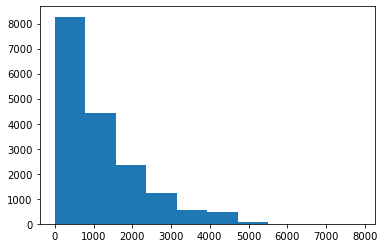

In [17]:
# Diagrama de frecuencias (o Histograma)

import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(y)

In [18]:
y

0         182
1         138
2         134
3          72
4          47
         ... 
17409    1042
17410     541
17411     337
17412     224
17413     139
Name: bicis-compartidas, Length: 17414, dtype: int64

## Probabilidad condicional - Teorema de Bayes

Teorema de Bayes: Inferir la probabilidad de A cuando hay información parcial de A, condicionado a B y hay info total de la distribución del evento B.

Ejemplo: juego de azar de 10 esferas, unas de un color blanco, el resto negras.

In [29]:
import numpy as np
import pandas as pd
import scipy
import scipy.stats

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [31]:
df = pd.read_csv('juego-azar.csv', sep=';')
df.columns

Index(['bola', 'color', 'numero'], dtype='object')

In [36]:
# Probabilidades univariadas
# Conteo
df.numero.value_counts()

# Para convertir los conteos en probabilidades
df.numero.value_counts()/len(df)

1    0.4
3    0.3
2    0.3
Name: numero, dtype: float64

In [37]:
# Ahora la probabilidad univariada de los colores
df.color.value_counts()/len(df)

negro     0.6
blanco    0.4
Name: color, dtype: float64

In [38]:
# Probabilidades conjuntas bivariadas (usando groupby de Pandas)
df.groupby(['numero','color',]).size() # La función size es la que hace el conteo

# Esta función entrega los casos (eventos) de cada alternativa 

numero  color 
1       blanco    1
        negro     3
2       blanco    1
        negro     2
3       blanco    2
        negro     1
dtype: int64

In [39]:
# Ahora para convertir lo anterior en probabilidades
df.groupby(['numero','color']).size()/len(df)

numero  color 
1       blanco    0.1
        negro     0.3
2       blanco    0.1
        negro     0.2
3       blanco    0.2
        negro     0.1
dtype: float64

Ahora el **Teorema de Bayes**, que es útil para derivar análisis sobre A, que es un evento particular, cuando no conocemos sus probabilidades univariadas (o individuales), pero tenemos información sobre el evento condicionado de A a B (A condicionado B) y otras probabilidades de B.

**Ejemplo:** cuál es la probabilidad de tener una esfera blanca?

In [44]:
# p_blanca = 4/10

# Probabilidad de que la esfera sea blanca dado un número
#p(p_blanca|1) + p(p_blanca|2) + p(p_blanca|3) = p_blanca

# p(p_blanca*p(1)) + p(p_blanca)*p(2). + p(p_blanca)*p(3) = p(blanca)  # Esta es la prob total de que la esfera sea blanca
(1/4)*(4/10) + (1/3)*(3/10) + (2/3)*(3/10)

0.4

<img src="esferas.JPG" width="400" />

# Funciones de distribución discreta y continua

## Discreta

In [21]:
import numpy as np
import pandas as pd
import scipy
import scipy.stats

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [22]:
# Vamos a traer la distribución binomial from scipy
from scipy.stats import binom

In [23]:
# Definición de variables aleatorias x y su distribución y

p = 0.3 # probabilidad de éxito
n = 8 # número de intentos para obtener un número de éxitos

x=list(range(0,9,1)) # posibles valores de la distribución (de cero a 8)
y= list([]) # vector con una lista de probabilidades asociadas a cada valor de x

for i in x:
    y.append(binom.pmf(i,p=p, n=n)) # las probabilidades asociadas a cada número.

# probability mas function (pmf) calcula para un x su probabilidad asociada

In [24]:
y

[0.05764801000000002,
 0.1976503200000001,
 0.2964754800000002,
 0.25412184,
 0.1361367,
 0.04667544000000001,
 0.010001879999999989,
 0.0012247199999999988,
 6.560999999999994e-05]

1.0000000000000002

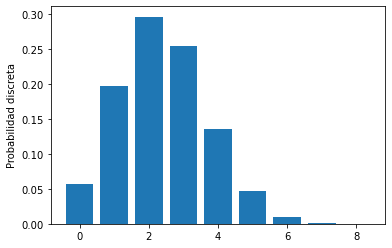

In [25]:
fig, ax = plt.subplots()
ax.bar(x,y)
ax.set_ylabel('Probabilidad discreta')
# Este gráfico contiene la distribución de probabilidad de la variable aleatoria Y.
# Se valida el intervalo 0,1 gráficamente y matemáticamente:
np.sum(y)

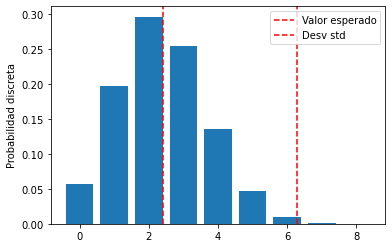

In [26]:
# Ahora se va a mapear el valor esperado y la media de la función

media = np.average(x, weights = y)

varianza = np.average(((x-media)**2),weights = y)

media, varianza


fig, ax = plt.subplots()
ax.bar(x,y)
ax.set_ylabel('Probabilidad discreta')
ax.axvline(x=media,c='r',linestyle='--', label='Valor esperado')
ax.axvline(x=media+3*np.sqrt(varianza),c='r',linestyle='--', label='Desv std')
ax.legend()

# Estos son los elementos más importantes de la distribución discreta

## Probabilidad continua

In [27]:
# Muestra aleatoria de 100 variables de distribución x
N = 100 

x = list(range(0,N+1,1))
y = list([])

for i in x:
    y.append(binom.pmf(i,p=0.3,n=N))

# N es el número de intentos.
# Mientras más grande N, más continua se verá la distribución y podrá aproximar mejor una variable continua.

Text(0.5, 1.0, 'Probabilidad continua')

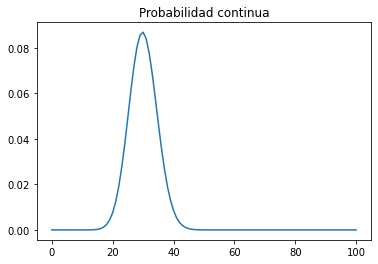

In [28]:
y
fig, ax = plt.subplots()
ax.plot(x,y)
ax.set_title('Probabilidad continua')

Text(0.5, 1.0, 'Probabilidad continua')

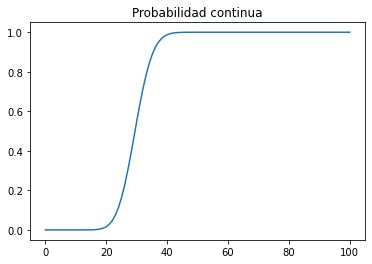

In [29]:
# Ahora la probabilidad acumulada

# Muestra aleatoria de 100 variables de distribución x
N = 100 

x = list(range(0,N+1,1))
y = list([])

for i in x:
    y.append(binom.cdf(i,p=0.3,n=N))


fig, ax = plt.subplots()
ax.plot(x,y)
ax.set_title('Probabilidad continua')
# cumulative densitiy function

In [30]:
# Acá se cambian los datos. Ya no vamos a evaluar una binomial, sino una normal.

# Pero primero se debe cargar la distribución normal
from scipy.stats import norm

# Para luego Ahora evaluar los valores característicos de esta distribución

mean, var, skew, kurt = norm.stats(moments='mvsk') #norm para una dist normal.

# Los momentos son las derivadas de la fn de dist de probabilidad
# 1er momento es la media
# 2da derivada: la varianza más unos cálculos adicionales
# 3ra derivada: asimetría
# 4derivada: curtosis

# skew es asimetría

In [31]:
print(mean) # que siempre es cero para una normal
print(var) # que siempre es 1 para una normal

0.0
1.0


## Distribuciones de mayor aplicación - Discretas

Bernoulli - modela un efecto binario: cero un fracaso, uno un exito.
<br>Binomial - número de éxitos X asociados a N ensayos.
<br>Geométrica - ensayos X antes de llegar al primer éxito de Bernoulli.
<br>Binomial negativa - número de ensayos X para llegar al k-ésimo éxito.
<br>Poisson - número de llegadas en N a una longitud de tiempo t.

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Bernoulli

In [44]:
from scipy.stats import bernoulli
# parámetro poblacional de la distribución, que es la probabilidad de éxito
# En Bernoulli el valor cero es No evento, el valor 1 es evento.
p=0.3
data=bernoulli.rvs(p,size=100)
len(data)

100

In [45]:
mean, var, skew, kurt = bernoulli.stats(p, moments = 'mvsk')
print(mean, var, skew, kurt)
# ojo que la var es p*(1-p)

0.3 0.21 0.8728715609439694 -1.2380952380952381


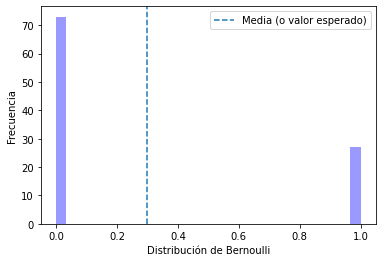

In [46]:
# Forma de la distribución
ax = sns.distplot(data, bins=30,kde=False,color='blue') #Kde es líneas o puntos
ax.set(xlabel='Distribución de Bernoulli',ylabel='Frecuencia')
#Vamos a agregar la línea de la media
ax.axvline(x=mean, linestyle='--', label = 'Media (o valor esperado)')
ax.legend()
# 70% de los datos cero. El 30% es el que es éxito.

### Binomial

In [60]:
from scipy.stats import binom
# parámetro de éxito
# Número de veces que queremos repetir la variable Bernoulli. En otras palabras:
# La probabilidad de que el resultado se 1, en n cantidad de pruebas.
p=0.3
n=10
data=binom.rvs(p=p,n=n, size=100)
len(data)

100

In [61]:
# Ahora los parámetros de la distribución
mean, var, skew, kurt = binom.stats(p=p,n=n, moments = 'mvsk')
print(mean, var, skew, kurt)

3.0 2.0999999999999996 0.2760262237369417 -0.12380952380952373


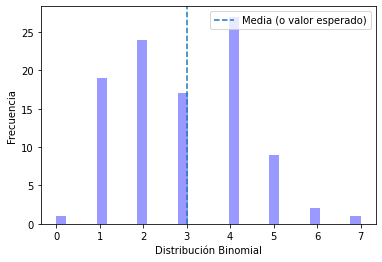

In [62]:
# Forma de la distribución
ax = sns.distplot(data, bins=30,kde=False,color='blue')
ax.set(xlabel='Distribución Binomial',ylabel='Frecuencia')
ax.axvline(x=mean, linestyle='--', label = 'Media (o valor esperado)')
ax.legend()

### Geométrica

In [63]:
from scipy.stats import nbinom
# La geométrica es un caso particular de la binomial - (negativa)
# Cuántos intentos debemos hacer para tener al menos un éxito

p=0.3 # parámetro de éxito
n=1
data=nbinom.rvs(p=p,n=n, size=100)
len(data)

100

In [64]:
# Ahora los parámetros de la distribución
mean, var, skew, kurt = nbinom.stats(p=p,n=n, moments = 'mvsk')
print(mean, var, skew, kurt)

2.3333333333333335 7.777777777777779 2.031888635868469 6.128571428571428


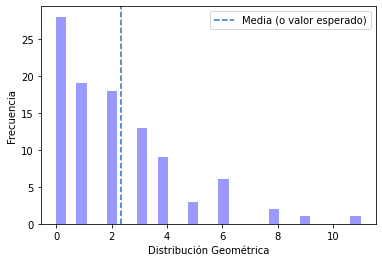

In [67]:
# Forma de la distribución
ax = sns.distplot(data, bins=30,kde=False,color='blue') #Kde es líneas o puntos
ax.set(xlabel='Distribución Geométrica',ylabel='Frecuencia')
ax.axvline(x=mean, linestyle='--', label = 'Media (o valor esperado)')
ax.legend()

# Hay mayor acumulación de probabilidad al inicio

### Binomial

Ahora la generalización de la binomial geométrica, que es la binomial per se.

In [68]:
from scipy.stats import nbinom

p=0.3
n=10 # Esto es 10 éxitos en x número de intentos

data = nbinom.rvs(p=p,n=n, size=100)

len(data)

100

In [69]:
# Ahora los parámetros de la distribución
mean, var, skew, kurt = nbinom.stats(p=p,n=n, moments = 'mvsk')
print(mean, var, skew, kurt)

23.333333333333336 77.77777777777779 0.6425396041156863 0.6128571428571429


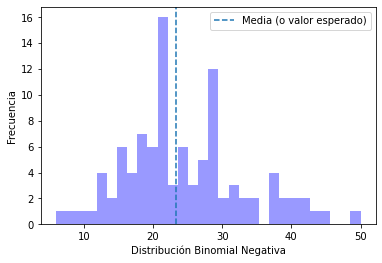

In [70]:
# Forma de la distribución
ax = sns.distplot(data, bins=30,kde=False,color='blue') #Kde es líneas o puntos
ax.set(xlabel='Distribución Binomial Negativa',ylabel='Frecuencia')
ax.axvline(x=mean, linestyle='--', label = 'Media (o valor esperado)')
ax.legend()

### Poisson

+ Solo tiene un parámetro que es lambda
+ El parámetro poblacional se define como 3 ocurrencias por unidad de tiempo (espacio finito de observación)
+ Probabilidad de K eventos en un intervalo de tiempo. Ejemplos:
    + Número de goles en un partido de futbol
    + Número de mensajes o llamadas que enviamos/recibimos por dia

Poisson se usa para variables numéricas discretas pero no acotadas (enteros no negativos, sin límite superior)

Tasa de ocurrencia = lambda / Espacio de tiempo de observación

Ambas, Poisson y Binomial, se usan para modelar conteos de eventos. La diferencia es:
- En Binomial el número de eventos no puede exceder el número de observaciones
- En Poisson no hay límite para la cantidad de eventos 

In [71]:
from scipy.stats import poisson

lambda_p = 3

p=0.3

data = poisson.rvs(mu=lambda_p, size=100)
# Acá la media es mu, que es la misma lambda

len(data)
# Esto es 100 valores distribuidos Poisson

100

In [72]:
# Ahora los parámetros de la distribución
mean, var, skew, kurt = poisson.stats(mu=lambda_p, moments = 'mvsk')
print(mean, var, skew, kurt)

3.0 3.0 0.5773502691896257 0.3333333333333333


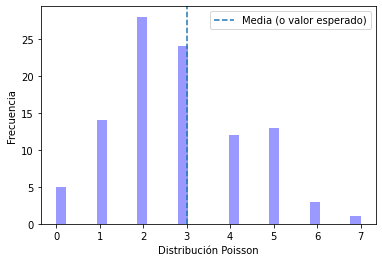

In [73]:
# Forma de la distribución
ax = sns.distplot(data, bins=30,kde=False,color='blue') #Kde es líneas o puntos
ax.set(xlabel='Distribución Poisson',ylabel='Frecuencia')
ax.axvline(x=mean, linestyle='--', label = 'Media (o valor esperado)')
ax.legend()

# Caso discreto y para un número no muy grande de eventos (100)

## Distribuciones de mayor aplicación - Var. continuas

**Exponencial**: es la inversa de la Poisson
* En Poisson se cuenta número de eventos por unidad de tiempo
* En Exponencial se cuenta el tiempo que toma llegar a uno de esos eventos    

In [74]:
from scipy.stats import expon

# No requerimos parámetro alguno
# Vamos a cambiar el random variable sample

data = expon.rvs(size=100000000)
# Se trabaja con un tamaño de muestra grande para ver la continuidad en las distribuciones

len(data)

100000000

In [75]:
# Ahora los parámetros de la distribución
mean, var, skew, kurt = expon.stats(moments = 'mvsk')
print(mean, var, skew, kurt)

1.0 1.0 2.0 6.0


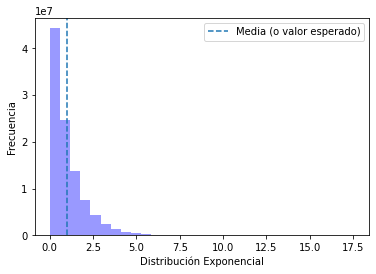

In [76]:
# Forma de la distribución
ax = sns.distplot(data, bins=30,kde=False,color='blue') #Kde es líneas o puntos
ax.set(xlabel='Distribución Exponencial',ylabel='Frecuencia')
ax.axvline(x=mean, linestyle='--', label = 'Media (o valor esperado)')
ax.legend()

### Normal

In [77]:
from scipy.stats import norm

# No requerimos parámetro alguno
# Vamos a cambiar el random variable sample

data = norm.rvs(size=50000)
#Se trabaja con un tamaño de muestra grande para ver la continuidad en las distribuciones

len(data)

50000

In [78]:
# Ahora los parámetros de la distribución
mean, var, skew, kurt = norm.stats(moments = 'mvsk')
print(mean, var, skew, kurt)

0.0 1.0 0.0 0.0


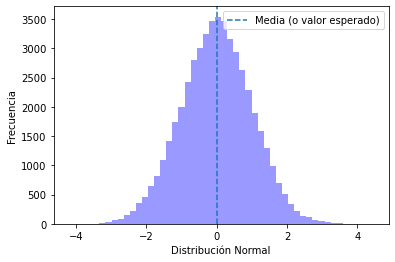

In [79]:
# Forma de la distribución
ax = sns.distplot(data, bins=50,kde=False,color='blue') #Kde es líneas o puntos
ax.set(xlabel='Distribución Normal',ylabel='Frecuencia')
ax.axvline(x=mean, linestyle='--', label = 'Media (o valor esperado)')
ax.legend()

## Estandarización, covarianza y correlación

**Estandarizar** una variable es restar su media y dividir sobre su desviación (esto es centrar y reducir).

El resultado de una variable **estandarizada** será una variable adimensional con valor esperado 0, y varianza y desv est = 1.

Cov y corr miden el valor lineal de la relación entre y y x.

La Covarianza solo habla de la dirección de esta relación.

La Correlación permite entender la dirección y la fuerza de esa relación.

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [81]:
df = pd.read_csv('DS_Bitácora_04_Iris.csv', index_col = 0)
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [82]:
df.Species.value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

In [84]:
# Vamos a estandarizar una variable

y = df['PetalLengthCm']
y
# Y es un valor continuo

Id
1      1.4
2      1.4
3      1.3
4      1.5
5      1.4
      ... 
146    5.2
147    5.0
148    5.2
149    5.4
150    5.1
Name: PetalLengthCm, Length: 150, dtype: float64

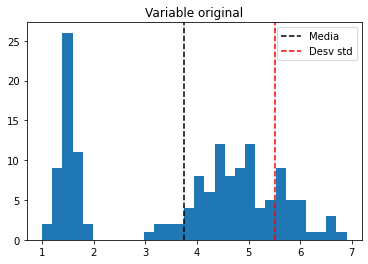

In [85]:
fig, ax = plt.subplots()
ax.set_title('Variable original')
ax.hist(y, bins=30)
ax.axvline(x=np.mean(y), c='k',label='Media',linestyle='--')
ax.axvline(x=np.mean(y)+np.std(y), c='r',label='Desv std',linestyle='--')
ax.legend()

El gráfico anterior presenta una distribución bimodal. Esto es 2 picos que s eidentifican fácilmente.
Esto puede indicar que la variable está categorizado dos poblaciones diferentes. En este caso sabemos que son tres.

Ahora vamos a estandarizar esta variable.
Paso 1: centrar la variable. Esto es restar la media a cada valor de y.

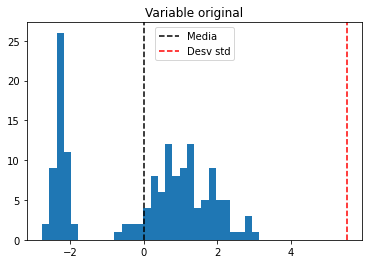

In [86]:
fig, ax = plt.subplots()
ax.set_title('Variable original')
ax.hist(y - np.mean(y), bins=30)
ax.axvline(x=np.mean(y - np.mean(y)), c='k',label='Media',linestyle='--')
ax.axvline(x=np.mean(y)+np.std(y), c='r',label='Desv std',linestyle='--')
ax.legend()

Notar en el gráfico anterior que ahora la distribución queda centrada sobre el eje cero.

Paso 2: la reducción de la variable.

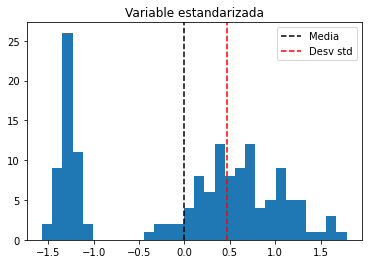

In [87]:
fig, ax = plt.subplots()
ax.set_title('Variable estandarizada')
ax.hist((y - np.mean(y))/np.std(y), bins=30)
ax.axvline(x = np.mean((np.mean(y - np.mean(y))/np.std(y))), c='k',label='Media',linestyle='--')
ax.axvline(x = np.mean((np.mean(y - np.mean(y))/np.std(y))) + np.std((y - np.mean(y))/np.mean(y)), c='r',label='Desv std',linestyle='--')
ax.legend()

# Medida adimensional con media cero

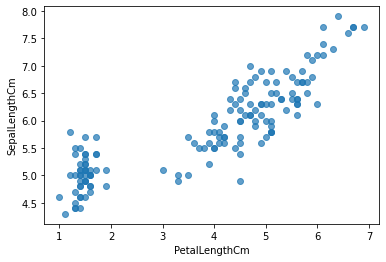

In [97]:
fig, ax = plt.subplots()
ax.scatter(df['PetalLengthCm'], df['SepalLengthCm'], alpha = 0.7) # El alpha permite ver dónde hay más concentración
ax.set_xlabel('PetalLengthCm')
ax.set_ylabel('SepalLengthCm')
ax.autoscale() # Ajuste de escala automático

Análisis gráfico: se observa que Sepal Lenght y Petal Length son dos variables con correlación directa positiva fuerte.

### Matriz de Covarianza

In [89]:
np.cov(df['PetalLengthCm'], df['SepalLengthCm'])
# 3 es la varianza

array([[3.11317942, 1.27368233],
       [1.27368233, 0.68569351]])

Interpretación: el 1,27 de la cov indica que hay relación positiva de magnitud 1,2. Pero no sabemos la fuerza de esa relación, porque la COV puede ir hasta infinito.

### Correlación

In [90]:
# Ahora las correlaciones
corr = df.corr(method = 'spearman')
corr

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.159457,0.881386,0.834421
SepalWidthCm,-0.159457,1.000000,-0.303421,-0.277511
PetalLengthCm,0.881386,-0.303421,1.000000,0.936003
PetalWidthCm,0.834421,-0.277511,0.936003,1.000000


Notar que entre Sepal Length y Petal Lenght, en efecto existe una correlación positiva cercana a 1, en este caso es 0,88.

A manera de ejemplo, considerar la Correlación Kendall, que no mide las correlaciones linealmente. Por eso la magnitud cambia.

In [91]:
df.corr(method = 'kendall')

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.072112,0.717624,0.654960
SepalWidthCm,-0.072112,1.000000,-0.182391,-0.146988
PetalLengthCm,0.717624,-0.182391,1.000000,0.803014
PetalWidthCm,0.654960,-0.146988,0.803014,1.000000
